Data Organization & Processing

In [26]:
# Gets necessary imports
import numpy as np
import heapq
import pandas as pd
import matplotlib.pyplot as plt

boba_data_set = pd.read_csv('bayarea_boba_spots.csv') # Reads the boba data set

# Organizes the boba data into their own individual variables
shop_names = boba_data_set['name'] # Gets all shop names
ratings = boba_data_set['rating'] # Gets all ratings
cities = boba_data_set['city'] # Gets all cities
latitudes = boba_data_set['lat'] # Gets the latitudes
longitudes = boba_data_set['long'] # Gets the Longitudes
# Hashamp(or dictionary) is used to pair the names with the scores for easy access, and averages any repeated shop names
# In each pair, the key will represent the store name, and the value will be a 
# numpy array holding two values: First index will be the average ratings,
# and the second will be the total quantity of that specific shop
hashmap = {}
for i in range(len(shop_names)):
    # Checks if the current shop already exist inside the hashmap, and add that to our total value.
    if shop_names[i] in hashmap:
        shop_arr = hashmap[shop_names[i]]
        shop_arr[1] += 1
        shop_arr[0] += float(ratings[i])
    # Initializes a new shop if it is not already present inside the hashmap
    else:
        new_arr = [0,0]
        new_arr[0] = float(ratings[i])
        new_arr[1] = 1
        hashmap[shop_names[i]] = new_arr

# We now average all the ratings if they have more than one shop 
for current in hashmap.keys():
    pair = hashmap[current]
    avg = pair[0] / pair[1]
    hashmap[current][0] = avg


housing_data_set = pd.read_csv('housing.csv') # Reads the housing data set

# Organizes the housing data into their own individual variables
longitudes_house = housing_data_set['longitude'] # Gets the longitudes of the houses
latitudes_house = housing_data_set['latitude'] # Gets the latitidues of the houses
house_values = housing_data_set['median_house_value'] # Gets the median house values

<class 'pandas.core.series.Series'>


<function matplotlib.pyplot.show(close=None, block=None)>

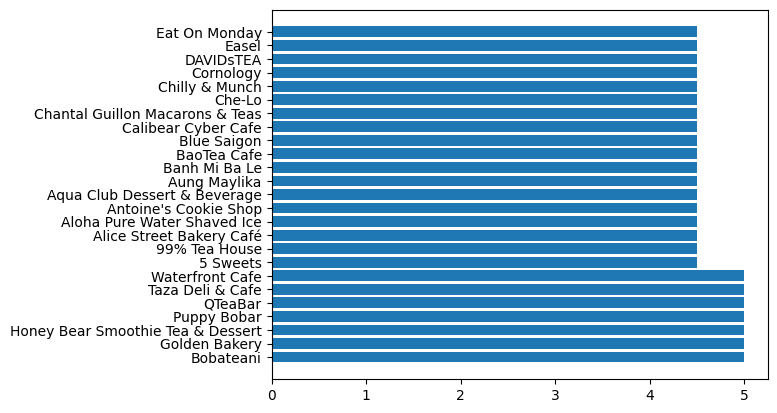

In [40]:
# First we will do an amounts bar graph visualization where the x axis will represent boba shops,
#  and the y axis will represent the rating

# We will graph the top 25 and the lowest 25 rating stores since there are so many.


# Top 25 Scores:

# We will use a priority queue for this portion since its easier to get the top 25 values
prio_queue = []
top_25_stores_ratings = np.zeros(25)
top_25_stores_names = []
checker = set()
for i in range(len(shop_names)):
    if shop_names[i] in checker:
        continue
    new_list = [0,0,0]
    pair = hashmap[shop_names[i]]
    new_list[0] = pair[0] * -1
    new_list[1] = pair[1] * - 1
    new_list[2] = str(shop_names[i])
    heapq.heappush(prio_queue, new_list)
    checker.add(shop_names[i])

for i in range(25):
    current = heapq.heappop(prio_queue)
    top_25_stores_ratings[i] = current[0] * -1
    top_25_stores_names.append(current[2])


plt.barh(top_25_stores_names, top_25_stores_ratings)
plt.show